Application of TDA in Cosmology
Esteban
Kevin
Franklin

In [1]:
import dionysus as d
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from astropy.io import fits
from astropy.visualization import astropy_mpl_style
from astropy.utils.data import get_pkg_data_filename

plt.style.use(astropy_mpl_style)

In [2]:
#prints the information in the .fits file (not entirely sure what all entries mean)
#more can be found in https://lambda.gsfc.nasa.gov/common/fits_header.cfm?fitsfile=%2Fdata%2Fmap%2Fdr5%2Fskymaps%2F9yr%2Fraw%2Fwmap%5Fimap%5Fr9%5F9yr%5FK1%5Fv5%2Efits
#tmap.info()

tmap = fits.open('wmap_imap_r9_9yr_W3_v5.fits')
#apparently the first extension of this .fits file contains the image data 
data = tmap[1].data



#prints a section of the data, seems like it is a list of tuples

print(data[0:5])

n = len(data)-1

x_val = np.empty(n)
y_val = np.empty(n)
for i in tqdm(range(0,n)):
    x_val[i] = data[i][0]
    y_val[i] = data[i][1]

#supposed to plot the image data when the data is in a 2D numpy array form
#plt.figure()
#plt.imshow(data, cmap='gray')
#plt.colorbar()


#seems that the "columns" are temperature and number of observations (counts)
#indicates that dataset is a counts vs temperature point cloud of the sky
#cols = tmap[1].columns
#cols.info()

  0%|          | 1488/3145727 [00:00<03:31, 14873.81it/s]

[(2.2998378, 3074.1948) (2.9589684, 3126.1853) (1.6670746, 3130.274 )
 (1.7374254, 3113.7168) (2.318041 , 3137.191 )]


100%|██████████| 3145727/3145727 [03:51<00:00, 13567.26it/s]


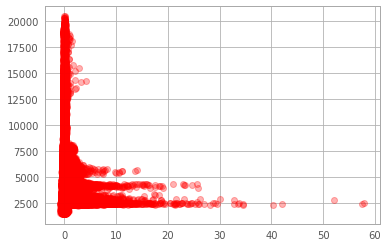

In [3]:
plt.plot(x_val, y_val,'o',color='red',alpha=0.3)

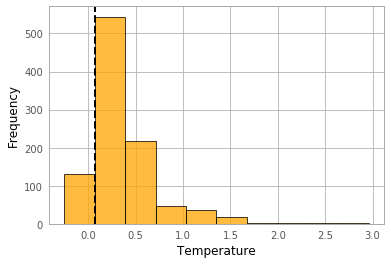

In [4]:
plt.hist(x_val[0:1000], ec='black',facecolor='orange', alpha=0.75)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.axvline(np.mean(x_val), color='k', linestyle='dashed', linewidth=2)
#average temparature of the universe is 2.72K

Text(0, 0.5, 'Frequency')

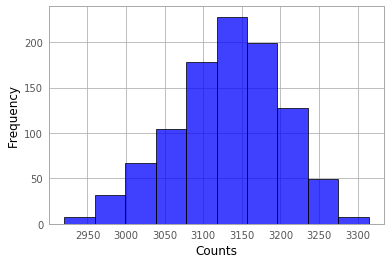

In [5]:
plt.hist(y_val[0:1000], ec='black',facecolor='blue', alpha=0.75)
plt.xlabel('Counts')
plt.ylabel('Frequency')


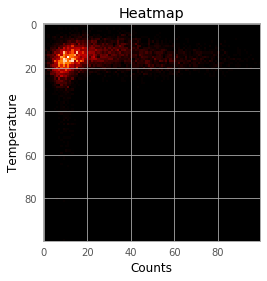

In [6]:
# Creates heatmap
heatmap, xedges, yedges = np.histogram2d(x_val[0:10000],y_val[0:10000],bins=(100,100))
#extent = [xedges[0], xedges[4], yedges[0], yedges[1000]]

# Plot heatmap
plt.clf()
plt.title('Heatmap')
plt.ylabel('Temperature')
plt.xlabel('Counts')
plt.imshow(heatmap)
plt.show()